### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [71]:
from sklearn.datasets import load_boston

In [72]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['price'])

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
scaler = StandardScaler(with_mean=False)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train.columns)

In [77]:
from sklearn.manifold import TSNE

In [78]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [79]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

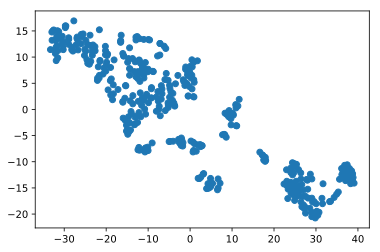

In [80]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

In [81]:
from sklearn.cluster import KMeans

In [82]:
model = KMeans(n_clusters=3, random_state=42, max_iter=100)

In [83]:
X_train_kmeans = model.fit_predict(X_train_scaled)

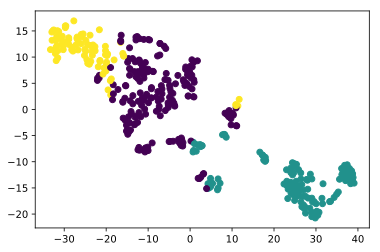

In [84]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=X_train_kmeans)

In [86]:
X_train["Class"] = X_train_kmeans
X_train["price"] = y_train

C:\Users\Viktor.Vashchenkov\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Viktor.Vashchenkov\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [87]:
X_train.groupby("Class").agg({"price": "mean", "CRIM": "mean"})

,price,CRIM
Class,,
0,24.971204,0.420986
1,16.179688,10.637094
2,27.874118,0.072118


In [88]:
X_train = X_train.drop('Class', axis=1)
X_train = X_train.drop('price', axis=1)

### * Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [89]:
X_test_kmeans = model.predict(X_test_scaled)

In [90]:
X_test["Class"] = X_test_kmeans
X_test["price"] = y_test

C:\Users\Viktor.Vashchenkov\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Viktor.Vashchenkov\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [91]:
X_test.groupby("Class").agg({"price": "mean", "CRIM": "mean"})

,price,CRIM
Class,,
0,21.860784,0.266079
1,16.437143,10.165531
2,31.350000,0.062060


In [92]:
X_test = X_test.drop('Class', axis=1)
X_test = X_test.drop('price', axis=1)